###                                                         LOGISTIC REGRESSION

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

dataset = pd.read_csv('binary_classification_train.csv')
dataset.head()
split = 0.8
s = int((dataset.values.shape[0])*split)
x_data = dataset.values[:s,1:21]
y_data = dataset.values[:s,21]
x_cv = dataset.values[s:,1:21]
y_cv = dataset.values[s:,21]

dataset = pd.read_csv('binary_classification_test.csv')
x_test = dataset.values[:,1:21]

w_i = np.zeros((20,))
b_i= 0

In [ ]:
"""
#feature scaling method 1
x_data/= x_data.max(axis=0)
print(x_data)
"""

'\n#feature scaling method 1\nx_data/= x_data.max(axis=0)\nprint(x_data)\n'

In [ ]:
"""
#feature scaling method 2
x_data = (x_data - np.mean(x_data,axis = 0))/(x_data.max(axis=0)-x_data.min(axis=0))
print(x_data)
"""

'\n#feature scaling method 2\nx_data = (x_data - np.mean(x_data,axis = 0))/(x_data.max(axis=0)-x_data.min(axis=0))\nprint(x_data)\n'

In [ ]:
#feature scaling method 3 (Z-Score)
m = np.mean(x_data, axis = 0)
s = np.std(x_data ,axis = 0)
def f_scale3(x,m,s):
    std=s
    x_f=(x - m)/(std+1e-8)
    return x_f
x_data = f_scale3(x_data,m,s)
x_cv = f_scale3(x_cv,m,s)
x_test = f_scale3(x_test,m,s)
print(x_data)

[[-0.90092605  1.593217   -0.1171581  ...  0.86704215  1.20200117
   0.26287816]
 [-2.32079226  2.33865969 -0.05397053 ... -1.39623189 -1.69598448
  -2.02424122]
 [ 0.40812232  0.52079392  0.37378359 ...  0.74293461  0.54703325
  -0.38232476]
 ...
 [ 0.17197558 -1.15208704 -1.02700234 ... -0.04596711 -0.95446479
   0.06442502]
 [-1.14323296  1.00395283  1.37361731 ... -0.65036336  0.54600408
  -2.26704984]
 [-0.00479178  0.66169641 -0.55624392 ... -0.38249938  0.56237751
   2.35915034]]


In [ ]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [ ]:
def cost_reg(x, y, w, b, lambdaa):
    m = x.shape[0]
    z = np.dot(x, w) + b
    fwb = sigmoid(z)
    cost = -np.mean(y*np.log(fwb) + (1 - y)*np.log(1 - fwb)) + (lambdaa/(2*m))*np.sum(w**2)
    return cost

In [ ]:
def grad(x, y, w, b, lambdaa):
    m,n = x.shape
    z=np.dot(x,w)+b
    fwb = np.array(sigmoid(z))
    djdw = (np.dot(x.T, (fwb - y)) / m) + (lambdaa / m) *w
    djdb = np.sum(fwb - y) / m
    return djdw, djdb

In [ ]:
def grad_descent(x, y, w_inp, b_inp, alpha, iterns, cost_fn, gradient, lambdaa):
    j_all = []
    w = w_inp
    b = b_inp
    for i in range(iterns):
        djdw, djdb = gradient(x, y, w, b, lambdaa)
        w -= alpha * djdw
        b -= alpha * djdb
        if i<100000:
            j_all.append(cost_fn(x, y, w, b, lambdaa))
        if i% math.ceil(iterns/10) == 0 or i == (iterns-1):
            print(f"Iterations:{i} Cost:{j_all[-1]:8.4f}")
    return w, b, j_all

iterations =500
alpha = 10**(-0.45)
lambdaa = 1
w_f, b_f, J_list = grad_descent(x_data, y_data, w_i, b_i, alpha, iterations, cost_reg, grad, lambdaa)
print(f"final (w,b) using gradient descent: {w_f},{b_f:8.4f}")
print(f'Cost using parameters found: {cost_reg(x_data, y_data, w_i, b_i,lambdaa)}')

Iterations:0 Cost:  0.5902
Iterations:50 Cost:  0.2602
Iterations:100 Cost:  0.2523
Iterations:150 Cost:  0.2508
Iterations:200 Cost:  0.2504
Iterations:250 Cost:  0.2503
Iterations:300 Cost:  0.2502
Iterations:350 Cost:  0.2502
Iterations:400 Cost:  0.2502
Iterations:450 Cost:  0.2502
Iterations:499 Cost:  0.2502
final (w,b) using gradient descent: [ 0.02422878 -0.014737   -0.01589522 -0.74347203 -0.0890122   1.662019
  0.03830569  0.0578473   0.27543106  0.10161849  0.03410803 -0.12981355
  0.01253368  0.30918496  0.68523038 -0.5272509   0.86573416 -0.44068786
 -0.29651608  0.05281172], -1.3389
Cost using parameters found: 0.3238097154923779


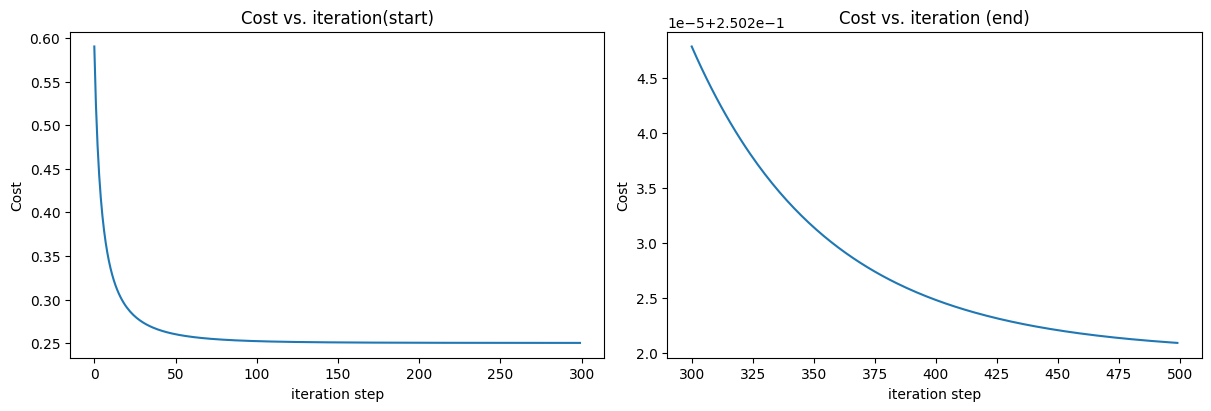

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_list[:300])
ax1.set_title("Cost vs. iteration(start)")
ax1.set_xlabel('iteration step')
ax1.set_ylabel('Cost')
ax2.plot(300 + np.arange(len(J_list[300:])), J_list[300:])
ax2.set_title("Cost vs. iteration (end)")
ax2.set_xlabel('iteration step')
ax2.set_ylabel('Cost')
plt.show()

In [ ]:
def f1_score(y_pred, y_true):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    if precision + recall == 0:
        return 0
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

In [ ]:
def prediction(x, w, b):
    z = np.dot(x, w) + b
    fwb = sigmoid(z)
    return (fwb>0.5).astype(int)
p = prediction(x_cv, w_f, b_f)

print("Accuracy:", np.mean(p==y_cv)*100)
print("F1 score:", f1_score(p,y_cv))

test_pred = prediction(x_test, w_f, b_f)
print(test_pred)

Accuracy: 93.00827966881324
F1 score: 0.8901903367496339
[0 0 0 ... 0 0 0]


In [ ]:
y_test_pred_df = pd.DataFrame(test_pred, columns=["Predicted"])
y_test_pred_df.to_csv("y_test_pred.csv", index=False)

print("Predictions saved to 'y_test_pred.csv'.")

Predictions saved to 'y_test_pred.csv'.
